## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [ ]:
# Load data in a pandas dataframe
customer_df = pd.read_csv("VSNeoBank.csv")

# Display first few rows
customer_df.head(50)

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status
0,1621953962,M,51,Married,2,$70K - $90K,Silver,4123.0,5,46,1760,0.427,2447,40,2,3,Closed
1,1599451862,M,46,Married,3,$90K - $110K,Silver,19458.0,4,40,1435,0.074,1217,27,3,3,Active
2,1429196012,F,49,Married,1,$50K - $70K,Silver,1438.3,4,41,522,0.363,2030,37,3,3,Closed
3,1417901012,M,54,Married,3,$90K - $110K,Gold,34516.0,2,36,761,0.022,8444,68,1,3,Closed
4,1427399912,M,47,Single,2,$90K - $110K,Silver,34516.0,3,36,1264,0.037,7827,77,2,2,Active
5,1432477412,F,46,Married,1,Less than $50K,Silver,2532.0,4,37,1487,0.587,4143,71,2,2,Active
6,1432736462,F,45,Married,2,Unknown,Silver,8103.0,2,36,0,0.000,5221,82,3,1,Active
7,1431547262,M,41,Married,3,$110K and Over,Gold,34516.0,3,36,1453,0.042,4147,76,2,3,Active
8,1416980462,F,57,Married,3,Less than $50K,Silver,2515.0,5,47,1922,0.764,2231,58,3,3,Active
9,1435853912,F,48,Divorced,2,Unknown,Silver,3745.0,3,37,1291,0.345,4956,88,2,4,Active


## Data cleanup

### Remove duplicates, missing values, outliers and unnecessary rows/columns

In [ ]:
# Check if there are any duplicate rows
customer_df.duplicated().any()

False

In [ ]:
# Check percentage of missing values for each column
col_null_percentage = (customer_df.isna().sum()/customer_df.shape[0]) * 100
col_null_percentage

CustomerID                           0.0
Sex                                  0.0
Age                                  0.0
Marital Status                       0.0
Number of Dependants                 0.0
Annual Income                        0.0
Account Type                         0.0
Credit Limit                         0.0
Number of Accounts                   0.0
Months since Openning                0.0
Outstanding Balance                  0.0
Utilisation Ratio                    0.0
Total Amount of Transactions         0.0
Total Number of Transactions         0.0
Number of Contacts over 12 months    0.0
Months Inactive over 12 months       0.0
Status                               0.0
dtype: float64

In [ ]:
# Let's check if the dataset is balanced i.e. dataset contains roughly equal number of positive and negative examples
customer_df['Status'].value_counts()

Active    6799
Closed    1302
Name: Status, dtype: int64

In [ ]:
customer_df[customer_df['Age'] < 0]

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status


## Data Exploration

In [ ]:
# Let's check account status per account type
customer_by_account_type = customer_df.groupby(['Account Type', 'Status'], as_index=False)['CustomerID'].count().rename(columns={"CustomerID": "Number Of Customers"})
customer_by_account_type

,Account Type,Status,Number Of Customers
0,Diamond,Active,76
1,Diamond,Closed,18
2,Gold,Active,370
3,Gold,Closed,67
4,Silver,Active,6338
5,Silver,Closed,1213
6,Titanium,Active,15
7,Titanium,Closed,4


In [ ]:
# Let's plot it to visualize
fig = px.bar(customer_by_account_type, x='Account Type', y='Number Of Customers', color='Status', barmode='group')
fig.show()

In [ ]:
# Let's check account status per account type
customer_by_marital_status = customer_df.groupby(['Marital Status', 'Status'], as_index=False)['CustomerID'].count().rename(columns={"CustomerID": "Number Of Customers"})
customer_by_marital_status

,Marital Status,Status,Number Of Customers
0,Divorced,Active,508
1,Divorced,Closed,96
2,Married,Active,3163
3,Married,Closed,573
4,Single,Active,2621
5,Single,Closed,525
6,Unknown,Active,507
7,Unknown,Closed,108


In [ ]:
# Let's plot it to visualize
fig = px.bar(customer_by_marital_status, x='Marital Status', y='Number Of Customers', color='Status', barmode='group')
fig.show()

In [ ]:
# Let's plot account status vs months since account was opened
customer_by_month_since_opening = customer_df.groupby(['Months since Openning', 'Status'], as_index=False)['CustomerID'].count().rename(columns={"CustomerID": "Number Of Customers"})

In [ ]:
# Let's plot bookings by month to visualize
fig = px.bar(customer_by_month_since_opening, x='Months since Openning', y='Number Of Customers', color='Status', barmode='group')
fig.show()

In [ ]:
customer_by_month_since_opening['Closing Ratio'] = customer_by_month_since_opening.groupby(['Months since Openning'])['Number Of Customers'].transform(lambda x: x/x.sum() * 100)
# Let's plot closed by months since opening to visualize
fig = px.line(customer_by_month_since_opening[customer_by_month_since_opening['Status'] == 'Closed'], x='Months since Openning', y='Closing Ratio', markers=True)
fig.show()

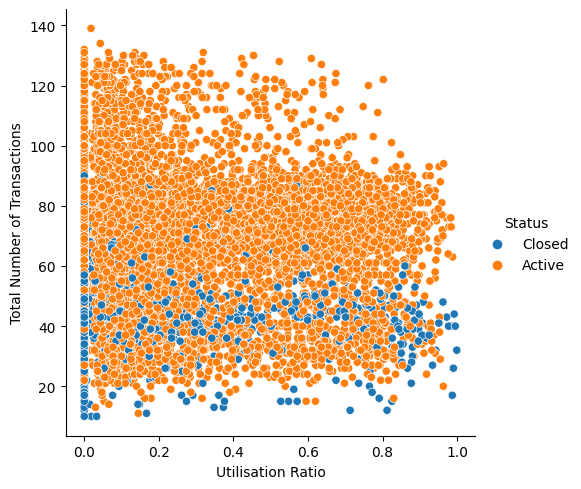

In [ ]:
# Let's explore relationship Utilisation Ratio, Total Number of Transactions and Account status
sns.relplot(data=customer_df, x="Utilisation Ratio", y="Total Number of Transactions", hue="Status")

### We observe that lower number of transactions lead to higher probability of account closure

### Let's convert all columns to numerical so we can generate correlation matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_transform = ['Sex', 'Marital Status', 'Annual Income', 'Account Type', 'Status']

# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
for col in columns_to_transform:
  label = label_encoder.fit_transform(customer_df[col])
  customer_df[f'{col}_encoded'] = label

customer_df

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,...,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status,Sex_encoded,Marital Status_encoded,Annual Income_encoded,Account Type_encoded,Status_encoded
0,1621953962,M,51,Married,2,$70K - $90K,Silver,4123.0,5,46,...,2447,40,2,3,Closed,1,1,2,2,1
1,1599451862,M,46,Married,3,$90K - $110K,Silver,19458.0,4,40,...,1217,27,3,3,Active,1,1,3,2,0
2,1429196012,F,49,Married,1,$50K - $70K,Silver,1438.3,4,41,...,2030,37,3,3,Closed,0,1,1,2,1
3,1417901012,M,54,Married,3,$90K - $110K,Gold,34516.0,2,36,...,8444,68,1,3,Closed,1,1,3,1,1
4,1427399912,M,47,Single,2,$90K - $110K,Silver,34516.0,3,36,...,7827,77,2,2,Active,1,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,1417736312,M,43,Married,3,$90K - $110K,Silver,4196.0,2,32,...,14545,116,2,1,Active,1,1,3,2,0
8097,1429146062,F,49,Married,3,Less than $50K,Silver,1438.3,3,36,...,4553,78,3,2,Active,0,1,4,2,0
8098,1421458712,F,49,Married,3,Less than $50K,Silver,1763.0,4,36,...,2813,43,2,2,Closed,0,1,4,2,1
8099,1427072012,M,56,Married,1,$110K and Over,Silver,2585.0,6,48,...,1590,33,4,3,Active,1,1,0,2,0


,CustomerID,Age,Number of Dependants,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Sex_encoded,Marital Status_encoded,Annual Income_encoded,Account Type_encoded,Status_encoded
CustomerID,1.000000,0.008653,0.001280,0.006819,0.006642,0.132553,0.001754,0.001298,-0.022413,-0.003880,0.008006,0.000763,0.018167,-0.003613,-0.030019,-0.002470,-0.047010
Age,0.008653,1.000000,-0.121190,0.008829,-0.020404,0.789100,0.007648,0.001777,-0.044511,-0.068058,-0.020988,0.060854,-0.010660,-0.015132,-0.016978,0.018689,0.026923
Number of Dependants,0.001280,-0.121190,1.000000,0.064637,-0.036280,-0.100608,-0.000715,-0.034090,0.026797,0.049793,-0.033985,-0.006987,0.005528,0.000130,-0.039847,-0.031337,0.022846
Credit Limit,0.006819,0.008829,0.064637,1.000000,-0.072061,0.009805,0.041369,-0.485468,0.170474,0.073280,0.026718,-0.022419,0.421670,0.029000,-0.218475,-0.457435,-0.024084
Number of Accounts,0.006642,-0.020404,-0.036280,-0.072061,1.000000,-0.016003,0.012754,0.067762,-0.347891,-0.237793,0.051900,-0.005771,0.006764,-0.015999,0.007361,0.074567,-0.156593
Months since Openning,0.132553,0.789100,-0.100608,0.009805,-0.016003,1.000000,0.002332,-0.009623,-0.039672,-0.048558,-0.016662,0.077787,-0.002058,-0.018906,-0.017750,0.011143,0.016702
Outstanding Balance,0.001754,0.007648,-0.000715,0.041369,0.012754,0.002332,1.000000,0.624092,0.069437,0.061719,-0.051207,-0.049939,0.029154,-0.026599,-0.026103,-0.020773,-0.272697
Utilisation Ratio,0.001298,0.001777,-0.034090,-0.485468,0.067762,-0.009623,0.624092,1.000000,-0.078503,0.007664,-0.058190,-0.018367,-0.256283,-0.024436,0.121843,0.189640,-0.184989
Total Amount of Transactions,-0.022413,-0.044511,0.026797,0.170474,-0.347891,-0.039672,0.069437,-0.078503,1.000000,0.805565,-0.110490,-0.037557,0.025673,0.037287,-0.012127,-0.167588,-0.167218
Total Number of Transactions,-0.003880,-0.068058,0.049793,0.073280,-0.237793,-0.048558,0.061719,0.007664,0.805565,1.000000,-0.149908,-0.041796,-0.065876,0.067331,0.033265,-0.113384,-0.370465


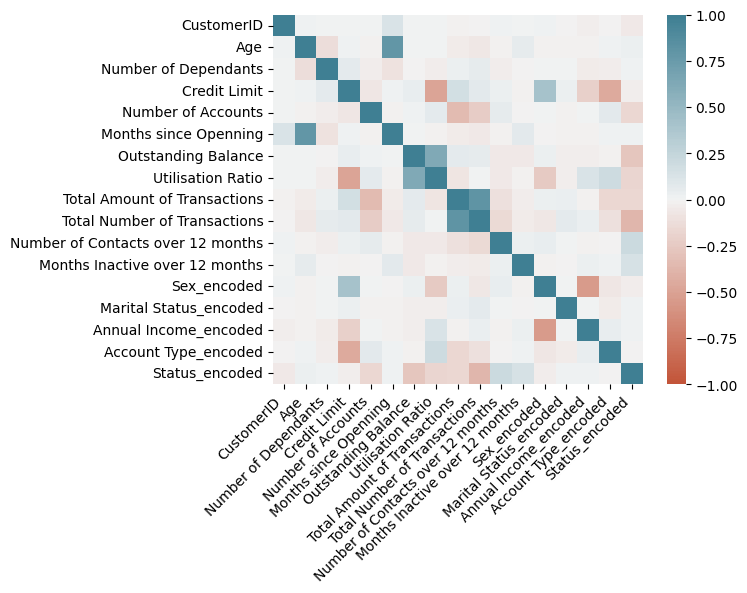

In [ ]:
# Let's generate correlation matrix.
# This can be used in two ways:
# 1. to drop highly correlated columns to avoid duplicate information.
# 2. to find which columns have most correlation with account status

correlation_matrix = customer_df.corr(numeric_only=True)
ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
correlation_matrix

,CustomerID,Age,Number of Dependants,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Sex_encoded,Marital Status_encoded,Annual Income_encoded,Account Type_encoded,Status_encoded
CustomerID,1.000000,0.019560,-0.004875,0.011923,0.015790,0.107628,0.000138,0.005082,-0.003003,0.003522,0.017925,-0.013102,0.015674,-0.006633,-0.027409,-0.001712,-0.058064
Age,0.019560,1.000000,-0.140257,0.006514,-0.024610,0.769509,0.006422,0.004069,-0.035638,-0.054397,-0.015809,0.052856,-0.012222,-0.021041,-0.012572,0.019435,0.027534
Number of Dependants,-0.004875,-0.140257,1.000000,0.049781,-0.033462,-0.113249,-0.002892,-0.032262,0.058346,0.052954,-0.036223,-0.005766,0.005748,-0.006777,-0.040350,-0.026834,0.023911
Credit Limit,0.011923,0.006514,0.049781,1.000000,-0.057395,0.005239,0.123601,-0.422543,0.026029,0.031642,0.025936,-0.027137,0.440784,0.023500,-0.230118,-0.346391,-0.050221
Number of Accounts,0.015790,-0.024610,-0.033462,-0.057395,1.000000,-0.019685,0.010865,0.063054,-0.275526,-0.222347,0.057905,-0.007523,0.007263,-0.013108,0.006656,0.067558,-0.156654
Months since Openning,0.107628,0.769509,-0.113249,0.005239,-0.019685,1.000000,0.001391,-0.006464,-0.027311,-0.035655,-0.011514,0.062576,-0.005877,-0.017146,-0.011468,0.008996,0.018715
Outstanding Balance,0.000138,0.006422,-0.002892,0.123601,0.010865,0.001391,1.000000,0.710317,0.018742,0.043563,-0.043116,-0.049041,0.029451,-0.029803,-0.027032,-0.017838,-0.249531
Utilisation Ratio,0.005082,0.004069,-0.032262,-0.422543,0.063054,-0.006464,0.710317,1.000000,0.021773,0.045425,-0.058537,-0.032867,-0.208164,-0.029827,0.100174,0.182319,-0.247190
Total Amount of Transactions,-0.003003,-0.035638,0.058346,0.026029,-0.275526,-0.027311,0.018742,0.021773,1.000000,0.878462,-0.164382,-0.030561,-0.098139,0.086096,0.054491,-0.103277,-0.221649
Total Number of Transactions,0.003522,-0.054397,0.052954,0.031642,-0.222347,-0.035655,0.043563,0.045425,0.878462,1.000000,-0.167380,-0.050078,-0.086330,0.081652,0.045293,-0.092620,-0.374794


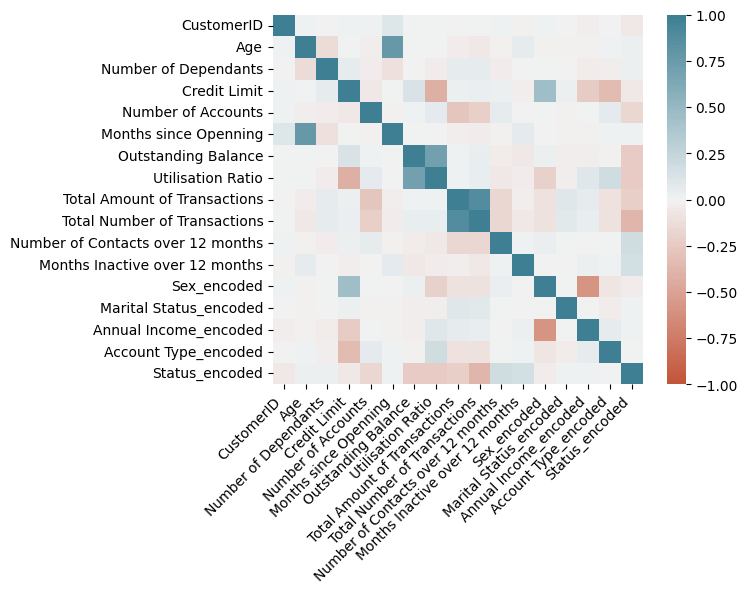

In [ ]:
# Let's try to find non-linear correlation using spearman method
spearman_correlation_matrix = customer_df.corr(method='spearman', numeric_only=True)
ax = sns.heatmap(
    spearman_correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
spearman_correlation_matrix

### From the two correlation matrix, we can make following observations:

#### 1. Total Number of Transactions have really high correlation with Total Amount of Transactions so we don't need to keep both the columns and we can drop one of them.
#### 2. Account Status has almost no correlation with Age, Number of Dependents, Credit Limit, Months since opening, Marital Status, Annual Income, Sex or Account Type so we can drop these too.
#### 3. Outstanding Balance has really high correlation with Utilisation Ratio so we can drop one of them


In [ ]:
feature_columns_to_keep = ['Number of Accounts', 'Outstanding Balance',
                           'Total Number of Transactions', 'Number of Contacts over 12 months',
                           'Months Inactive over 12 months', 'Status_encoded']

In [ ]:
customer_features_df = customer_df[feature_columns_to_keep]
customer_features_df.head()

,Number of Accounts,Outstanding Balance,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status_encoded
0,5,1760,40,2,3,1
1,4,1435,27,3,3,0
2,4,522,37,3,3,1
3,2,761,68,1,3,1
4,3,1264,77,2,2,0


### Let's address account `Status` imbalance by upsampling the `Closed` accounts

In [ ]:
from sklearn.utils import resample

# Upsample 'Closed Account' to balance the dataset
customer_features_df_majority = customer_features_df[customer_features_df.Status_encoded==0]
customer_features_df_minority = customer_features_df[customer_features_df.Status_encoded==1]

# Upsample minority class
df_minority_upsampled = resample(customer_features_df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=6799,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([customer_features_df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Status_encoded.value_counts()

0    6799
1    6799
Name: Status_encoded, dtype: int64

### Next we will check the mean and variance of all the features used. High mean and variance can lead to model bias towards features with large values and this should be addressed by normalizing

In [ ]:
# Check variance of all the features
df_upsampled.var()

Number of Accounts                        2.508863
Outstanding Balance                  793493.333269
Total Number of Transactions            509.365997
Number of Contacts over 12 months         1.279224
Months Inactive over 12 months            0.967184
Status_encoded                            0.250018
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
customer_features_df_scaled = pd.DataFrame(scaler.fit_transform(df_upsampled[feature_columns_to_keep[:-1]]), columns=feature_columns_to_keep[:-1])

In [ ]:
print(customer_features_df_scaled.mean(), customer_features_df_scaled.var())

Number of Accounts                   0.518826
Outstanding Balance                  0.380267
Total Number of Transactions         0.363248
Number of Contacts over 12 months    0.441989
Months Inactive over 12 months       0.412450
dtype: float64 Number of Accounts                   0.100355
Outstanding Balance                  0.125250
Total Number of Transactions         0.030609
Number of Contacts over 12 months    0.035534
Months Inactive over 12 months       0.026866
dtype: float64


### Build Model

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = customer_features_df_scaled
y = df_upsampled[feature_columns_to_keep[-1]]

In [ ]:
# Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
def print_metrics(y_test, y_pred, classifier):
  accuracy = accuracy_score(y_test, y_pred)
  confusion_mat = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print(f"Accuracy Score of {classifier} is : {accuracy}")
  ax = sns.heatmap(
    confusion_mat,
    annot=True,
    square=True)
  ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
  print(f"Confusion Matrix : \n{confusion_mat}")
  print(f"Classification Report : \n{report}")

Accuracy Score of logistic regression is : 0.8129901960784314
Confusion Matrix : 
[[1614  401]
 [ 362 1703]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2015
           1       0.81      0.82      0.82      2065

    accuracy                           0.81      4080
   macro avg       0.81      0.81      0.81      4080
weighted avg       0.81      0.81      0.81      4080



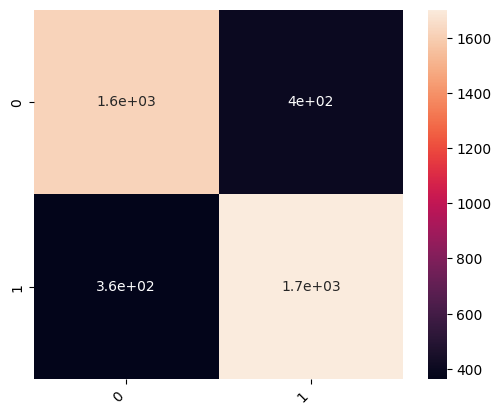

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print_metrics(y_test, y_pred_lr, 'logistic regression')

Accuracy Score of K-Nearest Neighbours is : 0.8855392156862745
Confusion Matrix : 
[[1717  298]
 [ 169 1896]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2015
           1       0.86      0.92      0.89      2065

    accuracy                           0.89      4080
   macro avg       0.89      0.89      0.89      4080
weighted avg       0.89      0.89      0.89      4080



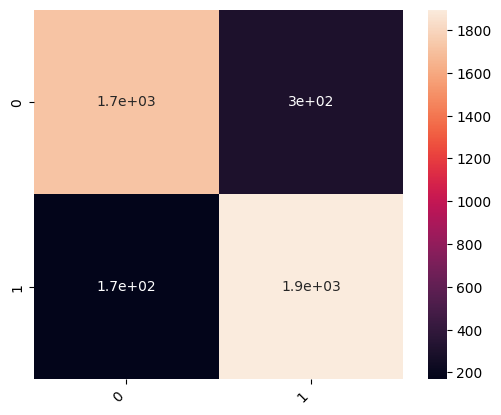

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print_metrics(y_test, y_pred_knn, 'K-Nearest Neighbours')

Accuracy Score of Decision Tree is : 0.9502450980392156
Confusion Matrix : 
[[1829  186]
 [  17 2048]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2015
           1       0.92      0.99      0.95      2065

    accuracy                           0.95      4080
   macro avg       0.95      0.95      0.95      4080
weighted avg       0.95      0.95      0.95      4080



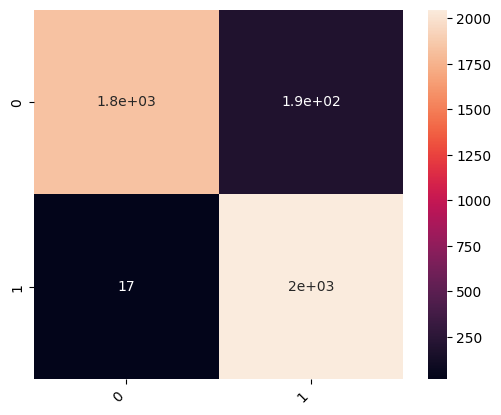

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dtc = decision_tree.predict(X_test)
print_metrics(y_test, y_pred_dtc, 'Decision Tree')

Accuracy Score of Random Forest is : 0.9651960784313726
Confusion Matrix : 
[[1890  125]
 [  17 2048]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2015
           1       0.94      0.99      0.97      2065

    accuracy                           0.97      4080
   macro avg       0.97      0.96      0.97      4080
weighted avg       0.97      0.97      0.97      4080



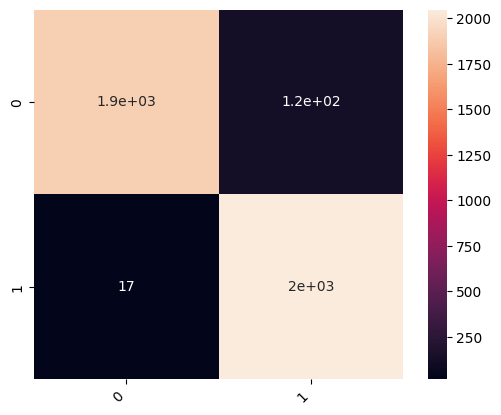

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)
print_metrics(y_test, y_pred_random_forest, 'Random Forest')

Accuracy Score of Support Vector Machine is : 0.8759803921568627
Confusion Matrix : 
[[1768  247]
 [ 259 1806]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2015
           1       0.88      0.87      0.88      2065

    accuracy                           0.88      4080
   macro avg       0.88      0.88      0.88      4080
weighted avg       0.88      0.88      0.88      4080



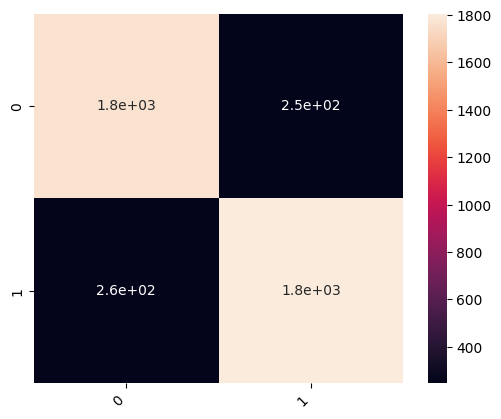

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print_metrics(y_test, y_pred_svm, 'Support Vector Machine')

In [ ]:
# Load competition data in a pandas dataframe
customer_deploy_df = pd.read_csv("VSNeoBank_competition.csv")
customer_deploy_df.head()

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months
0,1560618512,F,44,Married,2,Less than $50K,Silver,1924.0,5,30,1471,0.765,3521,58,3,2
1,1560534962,F,56,Single,2,Less than $50K,Silver,3495.0,4,42,1427,0.408,4466,85,2,2
2,1429962812,M,56,Single,3,$70K - $90K,Silver,1891.0,1,46,1134,0.600,5255,77,2,2
3,1427901662,M,55,Single,3,$70K - $90K,Silver,1602.0,3,47,962,0.600,4873,97,2,2
4,1577509712,F,52,Divorced,2,Less than $50K,Silver,2427.0,6,32,1581,0.651,3857,69,4,3


In [ ]:
# Check percentage of missing values for each column
deploy_col_null_percentage = (customer_deploy_df.isna().sum()/customer_deploy_df.shape[0]) * 100
deploy_col_null_percentage

CustomerID                           0.0
Sex                                  0.0
Age                                  0.0
Marital Status                       0.0
Number of Dependants                 0.0
Annual Income                        0.0
Account Type                         0.0
Credit Limit                         0.0
Number of Accounts                   0.0
Months since Openning                0.0
Outstanding Balance                  0.0
Utilisation Ratio                    0.0
Total Amount of Transactions         0.0
Total Number of Transactions         0.0
Number of Contacts over 12 months    0.0
Months Inactive over 12 months       0.0
dtype: float64

In [ ]:
customer_deploy_features_df = customer_deploy_df[feature_columns_to_keep[:-1]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
customer_deploy_features_df_scaled = pd.DataFrame(scaler.fit_transform(customer_deploy_features_df), columns=feature_columns_to_keep[:-1])

In [ ]:
predicted_labels = random_forest.predict(customer_deploy_features_df_scaled)

In [ ]:
customer_deploy_df['Predicted Label'] = predicted_labels.tolist()

In [ ]:
customer_deploy_df.to_csv("VSNeoBank_deploy_predlabels.csv", index=False)